In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df_capital = pd.read_csv("data/capital_at_constant_prices.csv")
print(f"The dataset on Capital Stock at Constant Prices has {df_capital.shape[0]} rows and {df_capital.shape[1]} columns.")
print(f"It's columns are: {list(df_capital.columns)}")
print(f"The observations start at {df_capital.iloc[0]["observation_date"]} and end on {df_capital.iloc[-1]["observation_date"]}.")
df_capital["year"] = [ year for year in range(1950, 2024)]
df_capital = df_capital[ ["year", "value"] ]
df_capital = df_capital.set_index("year")
df_capital.head()

The dataset on Capital Stock at Constant Prices has 74 rows and 2 columns.
It's columns are: ['observation_date', 'value']
The observations start at 1950-01-01 and end on 2023-01-01.


,value
year,
1950,1533460.875
1951,1640982.375
1952,1767725.375
1953,1894398.250
1954,2043172.875


In [ ]:
# Total Labor Compensation Data
df_labor_comp = pd.read_csv("data/81000-0015_labor_compensation.csv")

# df_labor_comp["Persons in employment (domestic concept)"]
# # df_labor_comp.head()
# columns_to_keep = [ 'time', 'value']
# df_labor_comp = df_labor_comp[ (df_labor_comp['value_variable_label'] == 'Compensation of employees (domestic concept)') & (df_labor_comp['2_variable_attribute_label'] == 'Total') ]
# df_labor_comp = df_labor_comp[columns_to_keep]
# df_labor_comp = df_labor_comp.sort_values('time')
# df_labor_comp = df_labor_comp.set_index('time')

KeyError: 'Persons in employment (domestic concept)'

In [68]:
# Nominal GDP
df_ngdp = pd.read_csv("data/ngdp.csv")
df_ngdp = df_ngdp[ df_ngdp["Country Name"] == "Germany" ]
df_ngdp = df_ngdp.T
df_ngdp.head()

,55
Country Name,Germany
Country Code,DEU
Indicator Name,GDP (current LCU)
Indicator Code,NY.GDP.MKTP.CN
1960,181715000000.0


In [69]:
df_rgdp = pd.read_csv("data/rgdp.csv")
df_rgdp = df_rgdp[ df_rgdp["Country Name"] == "Germany" ]
df_rgdp = df_rgdp.T
df_rgdp.head()

,55
Country Name,Germany
Country Code,DEU
Indicator Name,GDP (constant LCU)
Indicator Code,NY.GDP.MKTP.KN
1960,898944000000.0


In [70]:
# populate a list with years in consideration
years = [ str(year) for year in range(1991, 2024) ]

In [71]:
# extract the values for each year and store as a list
ngdp_values = { int(year): df_ngdp.loc[year]/10**9 for year in years }
rgdp_values = { int(year): df_rgdp.loc[year]/10**9 for year in years }

In [72]:
df_labor_share = { int(year): float(df_labor_comp.loc[int(year), 'value']) / ngdp_values[int(year)] for year in years }
df_labor_share

{1991: 55    0.542236
 Name: 1991, dtype: object,
 1992: 55    0.54788
 Name: 1992, dtype: object,
 1993: 55    0.546413
 Name: 1993, dtype: object,
 1994: 55    0.536749
 Name: 1994, dtype: object,
 1995: 55    0.539222
 Name: 1995, dtype: object,
 1996: 55    0.536145
 Name: 1996, dtype: object,
 1997: 55    0.527959
 Name: 1997, dtype: object,
 1998: 55    0.524582
 Name: 1998, dtype: object,
 1999: 55    0.525136
 Name: 1999, dtype: object,
 2000: 55    0.532776
 Name: 2000, dtype: object,
 2001: 55    0.524843
 Name: 2001, dtype: object,
 2002: 55    0.521861
 Name: 2002, dtype: object,
 2003: 55    0.520347
 Name: 2003, dtype: object,
 2004: 55    0.51066
 Name: 2004, dtype: object,
 2005: 55    0.502398
 Name: 2005, dtype: object,
 2006: 55    0.490627
 Name: 2006, dtype: object,
 2007: 55    0.481471
 Name: 2007, dtype: object,
 2008: 55    0.491145
 Name: 2008, dtype: object,
 2009: 55    0.512749
 Name: 2009, dtype: object,
 2010: 55    0.503622
 Name: 2010, dtype: object,
 2

In [73]:
df_capital_share = { year: 1 - share for (year, share) in df_labor_share.items() }
df_capital_share

{1991: 55    0.457764
 Name: 1991, dtype: object,
 1992: 55    0.45212
 Name: 1992, dtype: object,
 1993: 55    0.453587
 Name: 1993, dtype: object,
 1994: 55    0.463251
 Name: 1994, dtype: object,
 1995: 55    0.460778
 Name: 1995, dtype: object,
 1996: 55    0.463855
 Name: 1996, dtype: object,
 1997: 55    0.472041
 Name: 1997, dtype: object,
 1998: 55    0.475418
 Name: 1998, dtype: object,
 1999: 55    0.474864
 Name: 1999, dtype: object,
 2000: 55    0.467224
 Name: 2000, dtype: object,
 2001: 55    0.475157
 Name: 2001, dtype: object,
 2002: 55    0.478139
 Name: 2002, dtype: object,
 2003: 55    0.479653
 Name: 2003, dtype: object,
 2004: 55    0.48934
 Name: 2004, dtype: object,
 2005: 55    0.497602
 Name: 2005, dtype: object,
 2006: 55    0.509373
 Name: 2006, dtype: object,
 2007: 55    0.518529
 Name: 2007, dtype: object,
 2008: 55    0.508855
 Name: 2008, dtype: object,
 2009: 55    0.487251
 Name: 2009, dtype: object,
 2010: 55    0.496378
 Name: 2010, dtype: object,
 2

([<matplotlib.axis.XTick at 0x15a3bc410>,
 [Text(0.0, 0, '1991'),
  Text(5.0, 0, '1996'),
  Text(10.0, 0, '2001'),
  Text(15.0, 0, '2006'),
  Text(20.0, 0, '2011'),
  Text(25.0, 0, '2016'),
  Text(30.0, 0, '2021')])

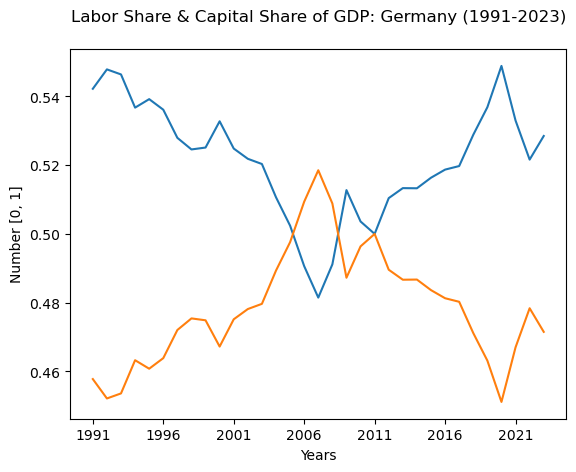

In [74]:
# plot the labor share and capital share in the chart
plt.plot(years, list(df_labor_share.values()), label="Labor Share")
plt.plot(years, list(df_capital_share.values()), label="Capital Share")
plt.title("Labor Share & Capital Share of GDP: Germany (1991-2023)", pad=20)
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Number [0, 1]")
plt.xticks(years[::5])

In [75]:
import numpy as np
gy = []
rgdp_temp = list(rgdp_values.values())
for idx, year in enumerate(years):
    if idx != 0:
        gy.append( (rgdp_temp[idx] / rgdp_temp[idx - 1] - 1) )

gy = np.array(gy)
gy.mean()

0.012690188275873746

In [76]:

labor_comp_temp = [ float(df_labor_comp.loc[int(year), 'value']) for year in years ]
gn = []
for idx, year in enumerate(years):
    if idx != 0:
        gn.append( (labor_comp_temp[idx] / labor_comp_temp[idx - 1] - 1)  )
gn = np.array(gn)
gn.mean()

0.030312233336647947

In [77]:
capital_share_temp = [ df_capital.loc[int(year), "value"] for year in years ]
gk = []
for idx, year in enumerate(years):
    if idx != 0:
        gk.append( (capital_share_temp[idx] / capital_share_temp[idx - 1] - 1) )
gk = np.array(gk)
gk.mean()

0.016221086840137067

In [78]:
# Extract values from the dictionary and ensure they are floats
alpha_list = [float(val) for val in df_capital_share.values()]

alpha = np.array(alpha_list[1:])

/var/folders/bs/j9ww8bm55_j9bc_3kbwlvddm0000gp/T/ipykernel_64311/4124712030.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  alpha_list = [float(val) for val in df_capital_share.values()]


Text(0, 0.5, 'Growth Rate [-1, 1]')

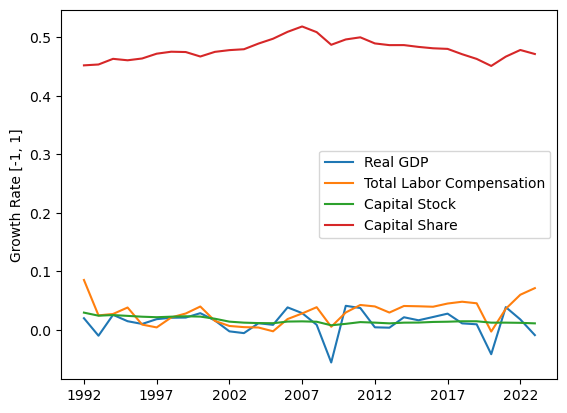

In [100]:
plt.plot(years[1:], gy, label="Real GDP")
plt.plot(years[1:], gn, label="Total Labor Compensation")
plt.plot(years[1:], gk, label="Capital Stock")
plt.plot(years[1:], alpha, label="Capital Share")
plt.legend()
plt.xticks(ticks=years[1::5])
plt.ylabel(ylabel="Growth Rate [-1, 1]")

In [87]:
ga = (gy - alpha * gk - (alpha -1) * gn) * 100
ga

array([[5.3545578074999085, 2.2683479066864116, 2.3013364497785425, ...,
        3.355687492446491, 4.569573857478848, 5.259612198789717],
       [2.367723630662104, -0.7184862701513932, -0.6854977270592623, ...,
        0.3688533156086861, 1.5827396806410432, 2.272778021951912],
       [5.937882852203639, 2.8516729513901424, 2.8846614944822733, ...,
        3.9390125371502216, 5.152898902182579, 5.842937243493448],
       ...,
       [7.250864376672854, 4.164654475859357, 4.197643018951488, ...,
        5.2519940616194365, 6.465880426651793, 7.155918767962663],
       [5.150395596770833, 2.0641856959573364, 2.097174239049467, ...,
        3.1515252817174155, 4.365411646749773, 5.055449988060642],
       [2.4712166142670955, -0.6149932865464018, -0.5820047434542709,
        ..., 0.4723462992136775, 1.6862326642460346, 2.3762710055569034]],
      dtype=object)

Text(0, 0.5, 'Growth Rate of Total Factor Productivity')

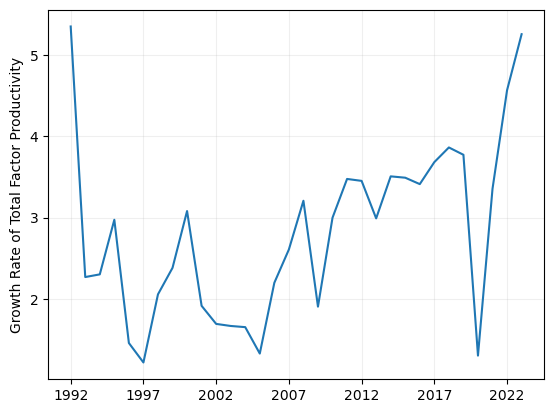

In [92]:
plt.plot(years[1:], ga[0])
plt.grid(alpha=0.2)
plt.xticks(ticks=years[1::5])
plt.ylabel(ylabel="Growth Rate of Total Factor Productivity")

In [81]:
# load population
df_popn = pd.read_csv("data/12411-0001_population.csv", index_col=1)
df_popn = df_popn[["value"]]
df_popn = df_popn.sort_values("time")
df_popn["year"] = [ year for year in range(1950, 2025) ]
df_popn = df_popn.reset_index()
df_popn = df_popn[["value", "year"]].set_index("year")
df_popn.head()

,value
year,
1950,50958125
1951,51434777
1952,51863761
1953,52453806
1954,52943295


In [82]:
# compute population growth